# Getting the Yelp BUSINESS information coded to METROs

Before we get deep into looking at geographical mapping of underserved areas, we need to figure out some promising categories of business to concentrate on.

Questions to inform that are:

1) What categories of business exist?

2) Are categories generally hierarchical, e.g. are all Pizza places also Restaurants?

3) For businesses that are in multiple categories, what are common groupings of categories?

4) How do the number of businesses in each category vary by city?

5) What are typical spreads of review score for businesses within a category?

First read in the _BUSINESS_ information into a dataframe.  Data arranged in the file as a list of JSON objects, so need to read in that way.

In [7]:
import json
import numpy as np
import pandas as pd

data = []
with open('yelp_academic_dataset_business.json') as f:
    biz = [json.loads(row) for row in f]  # note have to load this way to match JSON LINES formatting

dfb = pd.DataFrame(biz)
dfb.set_index("business_id", inplace = True)
dfb

,attributes,categories,city,full_address,hours,latitude,longitude,name,neighborhoods,open,review_count,stars,state,type
business_id,,,,,,,,,,,,,,
5UmKMjUEUNdYWqANhGckJw,"{'Caters': False, 'Drive-Thru': False, 'Ambien...","[Fast Food, Restaurants]",Dravosburg,"4734 Lebanon Church Rd\nDravosburg, PA 15034","{'Tuesday': {'open': '11:00', 'close': '21:00'...",40.354327,-79.900706,Mr Hoagie,[],True,7,3.5,PA,business
UsFtqoBl7naz8AVUBZMjQQ,"{'Outdoor Seating': False, 'Good For Groups': ...",[Nightlife],Dravosburg,"202 McClure St\nDravosburg, PA 15034",{},40.350553,-79.886814,Clancy's Pub,[],True,5,3.0,PA,business
cE27W9VPgO88Qxe4ol6y_g,{'Good for Kids': True},"[Active Life, Mini Golf, Golf]",Bethel Park,"1530 Hamilton Rd\nBethel Park, PA 15234",{},40.354115,-80.014660,Cool Springs Golf Center,[],False,5,2.5,PA,business
mVHrayjG3uZ_RLHkLj-AMg,"{'Caters': True, 'Delivery': False, 'Price Ran...","[Bars, American (New), Nightlife, Lounges, Res...",Braddock,"414 Hawkins Ave\nBraddock, PA 15104","{'Friday': {'open': '10:00', 'close': '20:00'}...",40.408830,-79.866211,Emil's Lounge,[],True,26,4.5,PA,business
mYSpR_SLPgUVymYOvTQd_Q,"{'Parking': {'valet': False, 'garage': False, ...","[Active Life, Golf]",Braddock,"1000 Clubhouse Dr\nBraddock, PA 15104","{'Wednesday': {'open': '11:00', 'close': '20:0...",40.403405,-79.855782,Grand View Golf Club,[],True,3,5.0,PA,business
KayYbHCt-RkbGcPdGOThNg,"{'Caters': False, 'Delivery': False, 'Price Ra...","[Bars, American (Traditional), Nightlife, Rest...",Carnegie,"141 Hawthorne St\nGreentree\nCarnegie, PA 15106","{'Monday': {'open': '11:00', 'close': '02:00'}...",40.415486,-80.067549,Alexion's Bar & Grill,[Greentree],True,23,4.0,PA,business
b12U9TFESStdy7CsTtcOeg,{'Accepts Credit Cards': True},"[Auto Repair, Automotive, Tires]",Carnegie,"718A Hope Hollow Rd\nCarnegie, PA 15106","{'Monday': {'open': '07:30', 'close': '18:00'}...",40.394588,-80.084454,Flynn's Tire & Auto Service,[],True,9,2.5,PA,business
Sktj1eHQFuVa-M4bgnEh8g,{'Good for Kids': True},"[Active Life, Mini Golf]",Carnegie,"920 Forsythe Rd\nCarnegie\nCarnegie, PA 15106",{},40.405404,-80.076267,Forsythe Miniature Golf & Snacks,[Carnegie],False,4,4.0,PA,business
3ZVKmuK2l7uXPE6lXY4Dbg,{},"[Roofing, Home Services, Decks & Railing, Cont...",Carnegie,"8 Logan St\nCarnegie\nCarnegie, PA 15106",{},40.406281,-80.090390,Quaker State Construction,[Carnegie],True,3,2.5,PA,business


Get some overall summary information

In [8]:
dfb.describe()

,latitude,longitude,review_count,stars
count,85901.000000,85901.000000,85901.000000,85901.000000
mean,37.034786,-99.107318,34.352359,3.694852
std,5.389208,27.437773,108.677591,0.946045
min,32.865882,-115.386550,3.000000,1.000000
25%,33.506767,-115.062628,5.000000,3.000000
50%,35.314392,-111.943739,10.000000,4.000000
75%,36.203094,-80.951101,26.000000,4.500000
max,56.033777,8.549249,6200.000000,5.000000


First look at count of business by city.  Notice that while there are only 10 cities in the dataset, there are many more city names. That means for a metro area, the individual municipalities are being reported, rather than just the overall metro area.  To break the data down into manageable elements, we are going to want to map these into metro areas and check no weird stuff is in there by accident.

In [9]:
dfb.city.value_counts()

Las Vegas              19328
Phoenix                11852
Charlotte               5695
Scottsdale              5638
Montréal                4371
Mesa                    3638
Pittsburgh              3628
Edinburgh               3360
Henderson               3145
Tempe                   3043
Chandler                2702
Madison                 2278
Glendale                2048
Gilbert                 1941
Peoria                  1081
North Las Vegas          952
Karlsruhe                906
Surprise                 681
Goodyear                 507
Champaign                505
Avondale                 427
Matthews                 399
Queen Creek              383
Waterloo                 297
Fort Mill                287
Urbana                   286
Cave Creek               266
Laval                    222
Middleton                222
Pineville                210
                       ...  
Saint-Léonard              1
St Leonard                 1
Roslin                     1
Peoria        

Next thought was maybe looking at state would be a simple way to identify the metro areas.  That works a lot better, but notice there are also more than ten states.  That's because some metro areas like Charlotte straddle multiple states.  So we will need to build a custom metro area column.  And there are also some oddities in there e.g. CA is the state for 4 of the businesses, even though none of the metro areas are in CA.  So we need to figure out what is happening with that.

In [10]:
dfb.state.value_counts()

AZ     36500
NV     23591
NC      6835
QC      5591
PA      4086
EDH     3297
WI      3066
BW      1055
IL       808
ON       530
SC       325
MLN      161
RP        18
ELN       11
FIF        5
CA         4
TX         3
FL         2
SCB        2
AK         1
NW         1
NTH        1
AL         1
NM         1
KHL        1
TAM        1
HAM        1
XGL        1
MN         1
           1
Name: state, dtype: int64

How does the combination of state and city look?  Let's print out all rows of the dataframe to understand it a bit more.

In [11]:
print(dfb.groupby(["state","city"]).size().to_string())

state  city                                       
       Montreal                                           1
AK     Chandler                                           1
AL     La Paz                                             1
AZ                                                        1
       Ahwahtukee                                         1
       Ahwatukee                                         12
       Ahwatukee Foothills Village                        1
       Anthem                                           135
       Apache Junction                                  186
       Arlington                                          2
       Avondale                                         427
       Black Canyon City                                  3
       Buckeye                                          163
       Carefree                                          54
       Casa Grande                                      201
       Cave Creek                                

So we don't know right now if the businesses in cities with small counts or weird states are incorrectly assigned to the wrong city/location of if they are in this dataset by mistake.  One way to cross-check will be to look at the latitude/longitude data and see if those values put them in the expected metro areas or not.

Let's take a quick look at average lat/long by reported 'state'.

Notice that for example the AK businesses seem to have lat/long very similar to the AZ average...meaning that those are probably coded to the wrong state.  But CA businesses seem to have very different lat long to NV or AZ, so maybe they are in by mistake.  This will need to fine tuned, then. 

In [12]:
dfb.groupby(["state"]).mean()

,latitude,longitude,open,review_count,stars
state,,,,,
,45.456136,-73.752866,1.000000,4.000000,2.000000
AK,33.276820,-111.790970,1.000000,3.000000,3.500000
AL,32.865882,-112.128931,1.000000,11.000000,2.000000
AZ,33.483937,-111.986776,0.854301,30.432630,3.710438
BW,49.002434,8.403916,0.914692,10.829384,3.771090
CA,35.492850,-114.293909,0.750000,24.250000,3.000000
EDH,55.949653,-3.197525,0.831362,12.804368,3.820594
ELN,55.941756,-3.062075,0.727273,5.272727,3.681818
FIF,56.018283,-3.394145,1.000000,7.800000,3.600000


A simple approach is to 

1) start by mapping just state to major metro area, for the 10 major metros, where that is obvious

2) Calculate an average lat and long for the businesses assigned to each of those metros

3) Look at businesses that were not mapped based on that simple approach and calculate their 'distance' to the average lat/long of each of the 10 major metros.

4) Assign businesses to one of the major metros based on their distance, or 'throw them out' for being too far from any of them

5) Sanity check the remainder by calculating their distance to the centre of their assigned major metro and make sure none of the businesses is an unreasonable distance from that.  If they are, 'throw them out'.

In [13]:
state_metro = {"AZ":"Phoenix", "NV":"Las Vegas", "NC":"Charlotte", "QC":"Montreal", "PA":"Pittsburgh",
               "EDH":"Edinburgh", "WI":"Madison", "BW":"Karlsruhe", "IL":"Urb-Champ", "ON":"Waterloo",
               "SC":"Charlotte", "MLN":"Edinburgh"
              }
dfb["metro"] = dfb.state.map(state_metro)
dfb

,attributes,categories,city,full_address,hours,latitude,longitude,name,neighborhoods,open,review_count,stars,state,type,metro
business_id,,,,,,,,,,,,,,,
5UmKMjUEUNdYWqANhGckJw,"{'Caters': False, 'Drive-Thru': False, 'Ambien...","[Fast Food, Restaurants]",Dravosburg,"4734 Lebanon Church Rd\nDravosburg, PA 15034","{'Tuesday': {'open': '11:00', 'close': '21:00'...",40.354327,-79.900706,Mr Hoagie,[],True,7,3.5,PA,business,Pittsburgh
UsFtqoBl7naz8AVUBZMjQQ,"{'Outdoor Seating': False, 'Good For Groups': ...",[Nightlife],Dravosburg,"202 McClure St\nDravosburg, PA 15034",{},40.350553,-79.886814,Clancy's Pub,[],True,5,3.0,PA,business,Pittsburgh
cE27W9VPgO88Qxe4ol6y_g,{'Good for Kids': True},"[Active Life, Mini Golf, Golf]",Bethel Park,"1530 Hamilton Rd\nBethel Park, PA 15234",{},40.354115,-80.014660,Cool Springs Golf Center,[],False,5,2.5,PA,business,Pittsburgh
mVHrayjG3uZ_RLHkLj-AMg,"{'Caters': True, 'Delivery': False, 'Price Ran...","[Bars, American (New), Nightlife, Lounges, Res...",Braddock,"414 Hawkins Ave\nBraddock, PA 15104","{'Friday': {'open': '10:00', 'close': '20:00'}...",40.408830,-79.866211,Emil's Lounge,[],True,26,4.5,PA,business,Pittsburgh
mYSpR_SLPgUVymYOvTQd_Q,"{'Parking': {'valet': False, 'garage': False, ...","[Active Life, Golf]",Braddock,"1000 Clubhouse Dr\nBraddock, PA 15104","{'Wednesday': {'open': '11:00', 'close': '20:0...",40.403405,-79.855782,Grand View Golf Club,[],True,3,5.0,PA,business,Pittsburgh
KayYbHCt-RkbGcPdGOThNg,"{'Caters': False, 'Delivery': False, 'Price Ra...","[Bars, American (Traditional), Nightlife, Rest...",Carnegie,"141 Hawthorne St\nGreentree\nCarnegie, PA 15106","{'Monday': {'open': '11:00', 'close': '02:00'}...",40.415486,-80.067549,Alexion's Bar & Grill,[Greentree],True,23,4.0,PA,business,Pittsburgh
b12U9TFESStdy7CsTtcOeg,{'Accepts Credit Cards': True},"[Auto Repair, Automotive, Tires]",Carnegie,"718A Hope Hollow Rd\nCarnegie, PA 15106","{'Monday': {'open': '07:30', 'close': '18:00'}...",40.394588,-80.084454,Flynn's Tire & Auto Service,[],True,9,2.5,PA,business,Pittsburgh
Sktj1eHQFuVa-M4bgnEh8g,{'Good for Kids': True},"[Active Life, Mini Golf]",Carnegie,"920 Forsythe Rd\nCarnegie\nCarnegie, PA 15106",{},40.405404,-80.076267,Forsythe Miniature Golf & Snacks,[Carnegie],False,4,4.0,PA,business,Pittsburgh
3ZVKmuK2l7uXPE6lXY4Dbg,{},"[Roofing, Home Services, Decks & Railing, Cont...",Carnegie,"8 Logan St\nCarnegie\nCarnegie, PA 15106",{},40.406281,-80.090390,Quaker State Construction,[Carnegie],True,3,2.5,PA,business,Pittsburgh


That's worked to map all but 56 of the businesses

In [14]:
dfb.metro.value_counts(dropna = False)

Phoenix       36500
Las Vegas     23591
Charlotte      7160
Montreal       5591
Pittsburgh     4086
Edinburgh      3458
Madison        3066
Karlsruhe      1055
Urb-Champ       808
Waterloo        530
NaN              56
Name: metro, dtype: int64

Can now calc average lat and long for the 10 metros

In [15]:
dfb.groupby(["metro"])[["latitude", "longitude"]].mean()

,latitude,longitude
metro,,
Charlotte,35.185885,-80.829257
Edinburgh,55.949106,-3.196816
Karlsruhe,49.002434,8.403916
Las Vegas,36.121839,-115.175277
Madison,43.079685,-89.403628
Montreal,45.510871,-73.603914
Phoenix,33.483937,-111.986776
Pittsburgh,40.436389,-79.974767
Urb-Champ,40.113157,-88.218004


Get a new frame of all the businesses with missing metros as this point

In [16]:
mm = dfb[dfb.metro.isnull()]
mm

,attributes,categories,city,full_address,hours,latitude,longitude,name,neighborhoods,open,review_count,stars,state,type,metro
business_id,,,,,,,,,,,,,,,
QEwH6wG1c1gUpt8Ut9uaOg,{'Accepts Credit Cards': True},"[Plumbing, Home Services]",Mesa,"254 S Mesa Dr\nMesa, CA 85210","{'Tuesday': {'open': '08:00', 'close': '16:00'...",33.408913,-111.823375,Gilbert Plumbing,[],True,3,2.5,CA,business,NaN
360u8cswdmyyo13jhvx0nw,"{'Delivery': False, 'Price Range': 1, 'Accepts...","[Breakfast & Brunch, American (Traditional), R...",Pittsburgh,"740 State Road 60 W\nWest End\nPittsburgh, FL ...",{},40.438167,-80.047319,IHOP,[West End],True,3,3.0,FL,business,NaN
g49oTp73Pk_WpOfQVtmcew,"{'Caters': False, 'Ambience': {'romantic': Fal...","[Steakhouses, American (New), Restaurants]",Las Vegas,"Plaza Hotel\n230 Plz\nDowntown\nLas Vegas, NM ...","{'Monday': {'open': '07:00', 'close': '21:00'}...",36.170790,-115.139560,The Landmark Grill,[Downtown],True,15,3.0,NM,business,NaN
ryvMJK6AlbU35HKrlFT61w,"{'Caters': False, 'Ambience': {'romantic': Fal...","[Steakhouses, Restaurants, Brazilian]",Dallas,"2952 N Stemmons Fwy\nSoutheast\nDallas, TX 75247","{'Monday': {'open': '17:00', 'close': '22:00'}...",36.070136,-115.175348,Texas de Brazil,[Southeast],False,1008,4.0,TX,business,NaN
mfLOmbdLonUX2lcOtP2aqA,"{'Dogs Allowed': True, 'Wheelchair Accessible'...","[Children's Clothing, Fashion, Shopping, Souve...",Stockbridge,5 Raeburn Place\nStockbridge\nStockbridge\nSto...,"{'Monday': {'open': '09:30', 'close': '18:00'}...",55.958844,-3.210384,Bliss Boutique,[Stockbridge],True,4,4.5,HAM,business,NaN
4AXq1iNvyZbxclZtOBWJqA,"{'Accepts Credit Cards': True, 'Wheelchair Acc...","[Sporting Goods, Shopping]",Edinburgh,4 Lady Lawson Street\nOld Town\nEdinburgh EH3 9DS,"{'Monday': {'open': '10:00', 'close': '18:00'}...",55.946436,-3.202043,Boardwise,[Old Town],True,6,4.0,SCB,business,NaN
LFf-IXdeb1nNil-BEQxQdA,"{'Accepts Credit Cards': True, 'Wheelchair Acc...","[Food, Specialty Food, Candy Stores, Ice Cream...",Musselburgh,34 Bridge Street\nMusselburgh EH21 6AG,"{'Monday': {'open': '10:00', 'close': '20:00'}...",55.943702,-3.058152,Elena DiRollo,[],True,4,4.5,ELN,business,NaN
d_JAhjTX4RojS1Bj1uNXGg,"{'Drive-Thru': False, 'Ambience': {'romantic':...","[Fast Food, Restaurants]",Inverkeithing,10 High Street\nInverkeithing KY11 1NN,{},56.030888,-3.397602,Happy Palace,[],True,3,4.0,FIF,business,NaN
6URo94G7HNmMeUYchlFX7Q,"{'Noise Level': 'average', 'Outdoor Seating': ...","[Restaurants, Italian]",Musselburgh,198 High Street\nMusselburgh EH21 7DX,{},55.941890,-3.053705,Caprice Restaurant,[],True,7,4.0,ELN,business,NaN


Looking at these in detail, some just seem obvious entry errors for state.  e.g. Gilbert plumbing, listed as Mesa CA in the address but with a lat/long in Mesa AZ.  Checking the Yelp site, this business is listed in Mesa AZ.

Others look like simple map extensions e.g. all the RP's are Karlsruhe, the FIF andd ELN as Edinburgh

But there's ambiguity in a few of these.  For example the Texas de Brazil steakhouse has a lat/long for Las Vegas, where there is a Texas de Brazil restaurant, but contains an address for Dallas, TX, where there is also a Texas de Brazil.  So does rest of the review information for the business refer to the Texas de Brazil in Dallas or the TdB in Las Vegas.  Hard to know without asking Yelp to backcheck (although we could check the location of reviewers).

And others just seem out of place, like the Chase bank with an address in Garland, TX but a lat/long for Las Vegas.

I'm going to next add some more elements to the state:metro map to account for the 'obvious' ones like ELN.

In [17]:
state_metro = {"AZ":"Phoenix", "NV":"Las Vegas", "NC":"Charlotte", "QC":"Montreal", "PA":"Pittsburgh",
               "EDH":"Edinburgh", "WI":"Madison", "BW":"Karlsruhe", "IL":"Urb-Champ", "ON":"Waterloo",
               "SC":"Charlotte", "MLN":"Edinburgh", "RP":"Karlsruhe", "FIF":"Edinburgh", "ELN":"Edinburgh"
              }
dfb["metro"] = dfb.state.map(state_metro)
dfb.metro.value_counts(dropna = False)

Phoenix       36500
Las Vegas     23591
Charlotte      7160
Montreal       5591
Pittsburgh     4086
Edinburgh      3474
Madison        3066
Karlsruhe      1073
Urb-Champ       808
Waterloo        530
NaN              22
Name: metro, dtype: int64

That has reduced the number of businesses with missing metros to 22.

In [18]:
mm = dfb[dfb.metro.isnull()]
mm

,attributes,categories,city,full_address,hours,latitude,longitude,name,neighborhoods,open,review_count,stars,state,type,metro
business_id,,,,,,,,,,,,,,,
QEwH6wG1c1gUpt8Ut9uaOg,{'Accepts Credit Cards': True},"[Plumbing, Home Services]",Mesa,"254 S Mesa Dr\nMesa, CA 85210","{'Tuesday': {'open': '08:00', 'close': '16:00'...",33.408913,-111.823375,Gilbert Plumbing,[],True,3,2.5,CA,business,NaN
360u8cswdmyyo13jhvx0nw,"{'Delivery': False, 'Price Range': 1, 'Accepts...","[Breakfast & Brunch, American (Traditional), R...",Pittsburgh,"740 State Road 60 W\nWest End\nPittsburgh, FL ...",{},40.438167,-80.047319,IHOP,[West End],True,3,3.0,FL,business,NaN
g49oTp73Pk_WpOfQVtmcew,"{'Caters': False, 'Ambience': {'romantic': Fal...","[Steakhouses, American (New), Restaurants]",Las Vegas,"Plaza Hotel\n230 Plz\nDowntown\nLas Vegas, NM ...","{'Monday': {'open': '07:00', 'close': '21:00'}...",36.170790,-115.139560,The Landmark Grill,[Downtown],True,15,3.0,NM,business,NaN
ryvMJK6AlbU35HKrlFT61w,"{'Caters': False, 'Ambience': {'romantic': Fal...","[Steakhouses, Restaurants, Brazilian]",Dallas,"2952 N Stemmons Fwy\nSoutheast\nDallas, TX 75247","{'Monday': {'open': '17:00', 'close': '22:00'}...",36.070136,-115.175348,Texas de Brazil,[Southeast],False,1008,4.0,TX,business,NaN
mfLOmbdLonUX2lcOtP2aqA,"{'Dogs Allowed': True, 'Wheelchair Accessible'...","[Children's Clothing, Fashion, Shopping, Souve...",Stockbridge,5 Raeburn Place\nStockbridge\nStockbridge\nSto...,"{'Monday': {'open': '09:30', 'close': '18:00'}...",55.958844,-3.210384,Bliss Boutique,[Stockbridge],True,4,4.5,HAM,business,NaN
4AXq1iNvyZbxclZtOBWJqA,"{'Accepts Credit Cards': True, 'Wheelchair Acc...","[Sporting Goods, Shopping]",Edinburgh,4 Lady Lawson Street\nOld Town\nEdinburgh EH3 9DS,"{'Monday': {'open': '10:00', 'close': '18:00'}...",55.946436,-3.202043,Boardwise,[Old Town],True,6,4.0,SCB,business,NaN
m8Zp8vB0utCT7ewjM3QPvg,{'Price Range': 2},"[Animal Shelters, Pets]",Bonnyrigg,Brewers Bush\nBonnyrigg EH19 3JH,"{'Wednesday': {'open': '12:00', 'close': '15:3...",55.858188,-3.070673,Lothian Cat Rescue,[],True,6,4.5,SCB,business,NaN
LjpkUvPGOPlBz0gJDMvkLQ,"{'Good For Groups': True, 'Alcohol': 'beer_and...","[Nightlife, Dance Clubs]",Edinburgh,28 King's Stable Rd\nGrassmarket\nEdinburgh EH...,"{'Monday': {'open': '22:00', 'close': '03:00'}...",55.947173,-3.199149,Stereo,"[Grassmarket, Old Town]",True,17,2.0,NTH,business,NaN
RKjWNwQ7rQ1Ehg0zezoM2Q,"{'Parking': {'valet': False, 'garage': False, ...","[Department Stores, Fashion, Shopping]",Edinburgh,109 Princes Street\nNew Town\nEdinburgh EH2 3AA,"{'Monday': {'open': '09:30', 'close': '18:00'}...",55.951442,-3.202045,Debenhams,[New Town],True,23,3.0,XGL,business,NaN


I think my rule is going to be:

1) check via Yelp/Google maps if a simple change to e.g. the state makes it a valid street address and Yelp's website shows that business at the corrected address in one of the metros.  If that is the case, map to the indicated metro.

3) if it is either a valid street address outside of the metro e.g. Bocholt, or it's a valid street address with ambiguity e.g. Texas de Brazil a valid street address, discard the business.  (Not possible to easily resolve the ambiguity and there's not too many of them)

Start by getting a list of the business names to build the map from, since they are all unique.

In [19]:
missing_names = list(mm.name)
missing_names

['Gilbert Plumbing',
 'IHOP',
 'The  Landmark Grill',
 'Texas de Brazil',
 'Bliss Boutique',
 'Boardwise',
 'Lothian Cat Rescue',
 'Stereo',
 'Debenhams',
 'Electric Daisy Carnival',
 'Chase Bank',
 'The Square',
 'iCracked Professional iPhone, iPod and iPad Repair',
 'Brooks Photography',
 'Waterless Auto Detailing',
 'Subway',
 'Academy Mortgage - Gilbert',
 'Great Clips',
 'Einstein Bros Bagels',
 'Burger King',
 'Forever Flawless',
 "McDonald's"]

In [20]:
new_map = {'Gilbert Plumbing':"Phoenix",
 'IHOP':"Pittsburgh",
 'The  Landmark Grill':"Las Vegas",
 'Texas de Brazil': np.nan,
 'Bliss Boutique':"Edinburgh",
 'Boardwise':"Edinburgh",
 'Lothian Cat Rescue':"Edinburgh",
 'Stereo':"Edinburgh",
 'Debenhams':"Edinburgh",
 'Electric Daisy Carnival':"Las Vegas",
 'Chase Bank':np.nan,
 'The Square':"Edinburgh",
 'iCracked Professional iPhone, iPod and iPad Repair':np.nan,
 'Brooks Photography':np.nan,
 'Waterless Auto Detailing':np.nan,
 'Subway':np.nan,
 'Academy Mortgage - Gilbert':"Phoenix",
 'Great Clips':"Las Vegas",
 'Einstein Bros Bagels':"Phoenix",
 'Burger King':"Montreal",
 'Forever Flawless':"Phoenix",
 "McDonald's":"Phoenix"}

Now use these to put the final correct metro mappings into the table.  Doing it in a couple of steps to make sure I don't overwrite anything or mess it up, as it took me quite a while to figure out how to get this step to work the way I wanted!

In [21]:
dfb["newmetro"] = dfb[dfb.metro.isnull()].name.map(new_map)
dfb[dfb.newmetro.notnull()]
dfb["final"] = "dropped"
dfb["final"] = dfb[dfb.metro.notnull()].metro
dfb.loc[dfb["newmetro"].notnull(), "final"] = dfb.newmetro

In [22]:
dfb.final.value_counts(dropna = False)

Phoenix       36505
Las Vegas     23594
Charlotte      7160
Montreal       5592
Pittsburgh     4087
Edinburgh      3480
Madison        3066
Karlsruhe      1073
Urb-Champ       808
Waterloo        530
NaN               6
Name: final, dtype: int64

So now we've got all but 6 of the businesses nicely mapped to a metro.  I want to drop the intermediate columns, rename the final column and save the new database back out to disk in json format.

In [23]:
dfb.head(3)

,attributes,categories,city,full_address,hours,latitude,longitude,name,neighborhoods,open,review_count,stars,state,type,metro,newmetro,final
business_id,,,,,,,,,,,,,,,,,
5UmKMjUEUNdYWqANhGckJw,"{'Caters': False, 'Drive-Thru': False, 'Ambien...","[Fast Food, Restaurants]",Dravosburg,"4734 Lebanon Church Rd\nDravosburg, PA 15034","{'Tuesday': {'open': '11:00', 'close': '21:00'...",40.354327,-79.900706,Mr Hoagie,[],True,7,3.5,PA,business,Pittsburgh,NaN,Pittsburgh
UsFtqoBl7naz8AVUBZMjQQ,"{'Outdoor Seating': False, 'Good For Groups': ...",[Nightlife],Dravosburg,"202 McClure St\nDravosburg, PA 15034",{},40.350553,-79.886814,Clancy's Pub,[],True,5,3.0,PA,business,Pittsburgh,NaN,Pittsburgh
cE27W9VPgO88Qxe4ol6y_g,{'Good for Kids': True},"[Active Life, Mini Golf, Golf]",Bethel Park,"1530 Hamilton Rd\nBethel Park, PA 15234",{},40.354115,-80.014660,Cool Springs Golf Center,[],False,5,2.5,PA,business,Pittsburgh,NaN,Pittsburgh


In [24]:
dfb.drop(["metro", "newmetro"], inplace = True, axis = 1)
dfb.head(3)

,attributes,categories,city,full_address,hours,latitude,longitude,name,neighborhoods,open,review_count,stars,state,type,final
business_id,,,,,,,,,,,,,,,
5UmKMjUEUNdYWqANhGckJw,"{'Caters': False, 'Drive-Thru': False, 'Ambien...","[Fast Food, Restaurants]",Dravosburg,"4734 Lebanon Church Rd\nDravosburg, PA 15034","{'Tuesday': {'open': '11:00', 'close': '21:00'...",40.354327,-79.900706,Mr Hoagie,[],True,7,3.5,PA,business,Pittsburgh
UsFtqoBl7naz8AVUBZMjQQ,"{'Outdoor Seating': False, 'Good For Groups': ...",[Nightlife],Dravosburg,"202 McClure St\nDravosburg, PA 15034",{},40.350553,-79.886814,Clancy's Pub,[],True,5,3.0,PA,business,Pittsburgh
cE27W9VPgO88Qxe4ol6y_g,{'Good for Kids': True},"[Active Life, Mini Golf, Golf]",Bethel Park,"1530 Hamilton Rd\nBethel Park, PA 15234",{},40.354115,-80.014660,Cool Springs Golf Center,[],False,5,2.5,PA,business,Pittsburgh


In [25]:
dfb = dfb.rename(columns = {"final":"metro"})
dfb.head(3)

,attributes,categories,city,full_address,hours,latitude,longitude,name,neighborhoods,open,review_count,stars,state,type,metro
business_id,,,,,,,,,,,,,,,
5UmKMjUEUNdYWqANhGckJw,"{'Caters': False, 'Drive-Thru': False, 'Ambien...","[Fast Food, Restaurants]",Dravosburg,"4734 Lebanon Church Rd\nDravosburg, PA 15034","{'Tuesday': {'open': '11:00', 'close': '21:00'...",40.354327,-79.900706,Mr Hoagie,[],True,7,3.5,PA,business,Pittsburgh
UsFtqoBl7naz8AVUBZMjQQ,"{'Outdoor Seating': False, 'Good For Groups': ...",[Nightlife],Dravosburg,"202 McClure St\nDravosburg, PA 15034",{},40.350553,-79.886814,Clancy's Pub,[],True,5,3.0,PA,business,Pittsburgh
cE27W9VPgO88Qxe4ol6y_g,{'Good for Kids': True},"[Active Life, Mini Golf, Golf]",Bethel Park,"1530 Hamilton Rd\nBethel Park, PA 15234",{},40.354115,-80.014660,Cool Springs Golf Center,[],False,5,2.5,PA,business,Pittsburgh


Finally write out the dataframe, excluding the businesses where we have NaN for metro

In [26]:
with open("bus_metro.json", "wt") as outfile:
    dfb[dfb.metro.notnull()].to_json(outfile)

Now check if it worked properly by reading it back in

In [27]:
with open("bus_metro.json", "rt") as infile:
    testdf = pd.read_json(infile)

In [28]:
testdf.describe()

,latitude,longitude,review_count,stars
count,85895.000000,85895.000000,85895.000000,85895.000000
mean,37.034650,-99.107972,34.342220,3.694854
std,5.389186,27.436061,108.630444,0.946033
min,32.865882,-115.386550,3.000000,1.000000
25%,33.506766,-115.062626,5.000000,3.000000
50%,35.314340,-111.943739,10.000000,4.000000
75%,36.203094,-80.950947,26.000000,4.500000
max,56.033777,8.549249,6200.000000,5.000000


Note: we now have 85,895 records where we like the metro assignment so far

Now going to make a scatter plot of the lat/long for each metro to see if the metros seems tight enough or if there are any unusual points a long way from the rest

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt

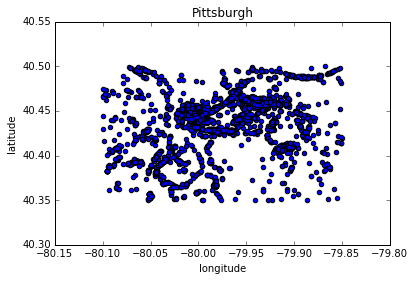

In [30]:
testdf[testdf.metro == "Pittsburgh"].plot(y = "latitude", x = "longitude", kind = "scatter")
plt.title("Pittsburgh")

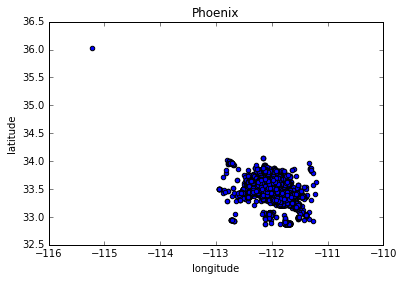

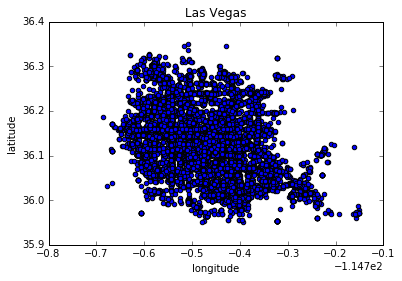

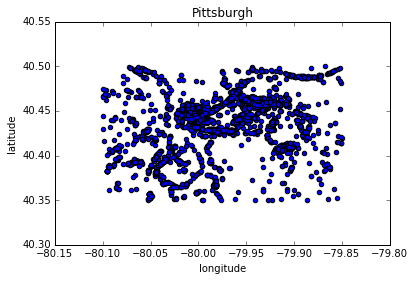

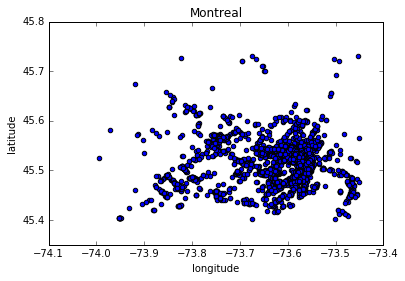

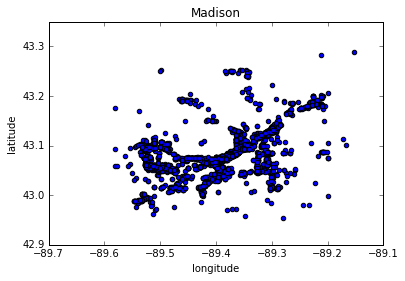

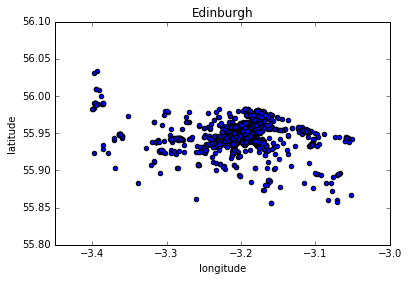

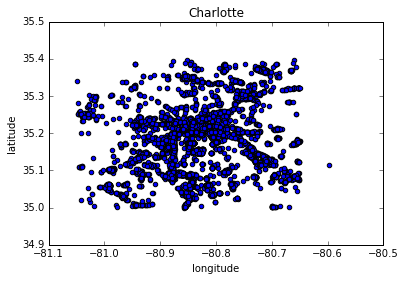

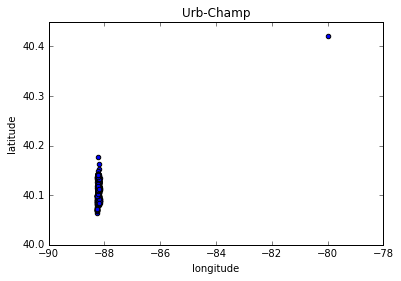

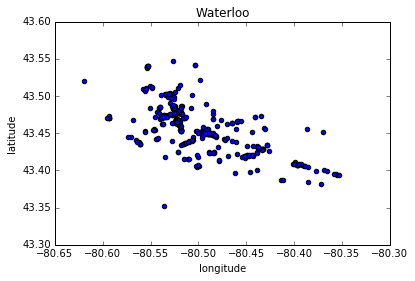

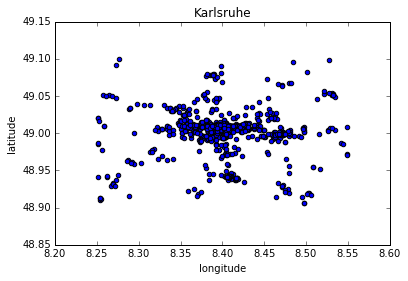

In [31]:
for m in testdf.metro.unique():
    testdf[testdf.metro == m].plot(y = "latitude", x = "longitude", kind = "scatter")
    plt.title(m)

So we can see that most of these look good but there are a couple of oddities in Urb-Champ and Phoenix.  

In [32]:
testdf[(testdf.metro == "Urb-Champ") & (testdf.longitude > -82)]

,attributes,categories,city,full_address,hours,latitude,longitude,metro,name,neighborhoods,open,review_count,stars,state,type
gchEJ-SV5_waDgjIa-2PxQ,{'Accepts Credit Cards': True},"[Plumbing, Home Services]",Arlington Heights,5031 N Oakley Ave\nSouth Side Slopes\nArlingto...,"{'Friday': {'open': '06:00', 'close': '05:30'}...",40.42123,-79.967607,Urb-Champ,Michael Paul Plumbing,[South Side Slopes],True,7,4.5,IL,business


In [33]:
testdf[(testdf.metro == "Phoenix") & (testdf.longitude < -114)]

,attributes,categories,city,full_address,hours,latitude,longitude,metro,name,neighborhoods,open,review_count,stars,state,type
yrkHElMMH-0SQ1BKvOZt9A,"{'Parking': {'valet': False, 'garage': False, ...","[Landmarks & Historical Buildings, Public Serv...",Grand Canyon,"5985 W Wigwam Ave\nSouthwest\nGrand Canyon, AZ...",{},36.034699,-115.224081,Phoenix,Grand Canyon Skywalk,[Southwest],True,61,2.5,AZ,business


So a couple of incorrectly grouped businesses here that we are going to want to drop

In [34]:
testdf.drop(testdf[(testdf.metro == "Urb-Champ") & (testdf.longitude > -82)].index, inplace = True)
testdf.drop(testdf[(testdf.metro == "Phoenix") & (testdf.longitude < -114)].index, inplace = True)
testdf

,attributes,categories,city,full_address,hours,latitude,longitude,metro,name,neighborhoods,open,review_count,stars,state,type
--0ZoBTQWQra1FxD4rBWmg,{'Accepts Credit Cards': False},"[Property Management, Home Services, Real Estate]",Phoenix,"2920 E Camelback Rd\nSte100\nPhoenix, AZ 85016","{'Thursday': {'open': '09:00', 'close': '17:00...",33.510773,-112.018737,Phoenix,Bourquin Residential Group,[],True,4,2.0,AZ,business
--1emggGHgoG6ipd_RMb-g,"{'Take-out': False, 'Parking': {'valet': False...","[Food, Convenience Stores]",Las Vegas,"3280 S Decatur Blvd\nWestside\nLas Vegas, NV 8...",{},36.130531,-115.207238,Las Vegas,Sinclair,[Westside],True,4,4.0,NV,business
--4Pe8BZ6gj57VFL5mUE8g,"{'Parking': {'valet': False, 'garage': False, ...","[Shopping, Office Equipment]",Phoenix,"21001 North Tatum Blvd. #24\nPhoenix, AZ 85050",{},33.676354,-111.973651,Phoenix,Office Max,[],True,9,3.0,AZ,business
--5jkZ3-nUPZxUvtcbr8Uw,"{'Caters': True, 'Noise Level': 'quiet', 'Good...","[Greek, Vegetarian, Mediterranean, Restaurants]",Scottsdale,"1336 N Scottsdale Rd\nScottsdale, AZ 85257","{'Friday': {'open': '11:00', 'close': '21:00'}...",33.463373,-111.926908,Phoenix,Mika's Greek,[],True,127,4.5,AZ,business
--7PRjnsjMA6uhPK8mW13Q,{},"[Bars, Nightlife]",Pittsburgh,"3160 Library Rd\nPittsburgh, PA 15234",{},40.371878,-80.008930,Pittsburgh,Castle Tavern,[],True,3,2.5,PA,business
--AKjxBmhm9DWrh-e0hTOw,"{'Take-out': False, 'Good For Groups': True, '...","[Restaurants, Italian]",Laval,"993 Boulevard Saint-Martin Ouest\nLaval, QC H7...","{'Wednesday': {'open': '11:00', 'close': '22:0...",45.572509,-73.720293,Montreal,Grigio,[],True,6,4.5,QC,business
--BlvDO_RG2yElKu9XA1_g,"{'Caters': True, 'Noise Level': 'average', 'Go...","[Sushi Bars, Hawaiian, Chinese, Restaurants]",Scottsdale,"14870 N Northsight Blvd\nSte 103\nScottsdale, ...","{'Friday': {'open': '10:30', 'close': '21:00'}...",33.621605,-111.899066,Phoenix,Asian Island,[],True,122,4.0,AZ,business
--Dl2rW_xO8GuYBomlg9zw,{'By Appointment Only': True},"[Medical Centers, Health & Medical]",Las Vegas,"4505 S Maryland Pkwy\nUniversity\nLas Vegas, N...",{},36.110940,-115.141514,Las Vegas,UNLV Student Health Center,[University],True,7,4.5,NV,business
--LzU4UT9rysIDXbhoWHiQ,"{'Parking': {'valet': False, 'garage': False, ...","[Hair Salons, Day Spas, Nail Salons, Beauty & ...",Pittsburgh,"99 S 10th St\nSouth Side\nPittsburgh, PA 15203","{'Thursday': {'open': '11:00', 'close': '20:00...",40.427499,-79.988313,Pittsburgh,Lunasea Salon+Day Spa,[South Side],True,10,4.5,PA,business
--NCcmQqh_NZbjW1S5XsGQ,"{'Parking': {'valet': False, 'garage': False, ...","[Bakeries, Food, Desserts]",Montréal,"291 Beaudoin Street\nSud-Ouest\nMontréal, QC H...","{'Thursday': {'open': '08:00', 'close': '18:00...",45.474274,-73.585614,Montreal,Sweet Lee's Rustic Bakery,[Sud-Ouest],False,5,4.5,QC,business


Now check the maps again

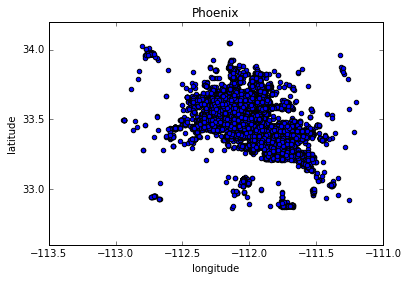

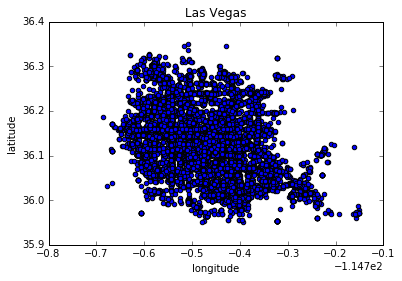

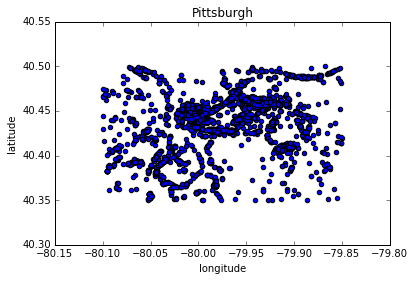

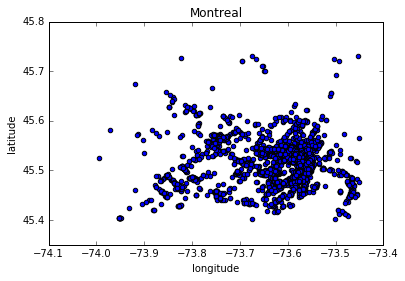

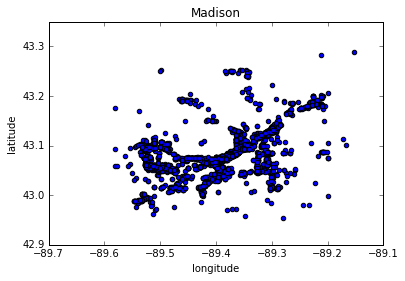

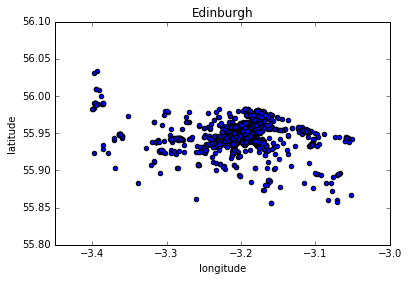

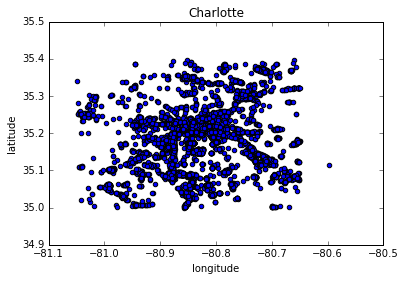

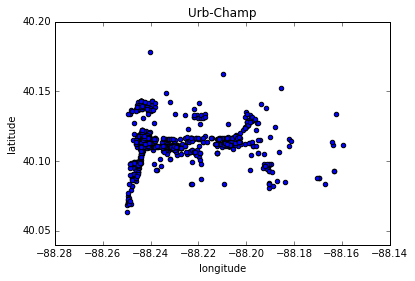

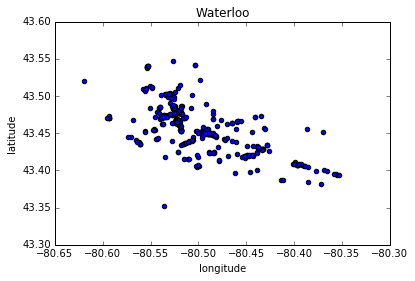

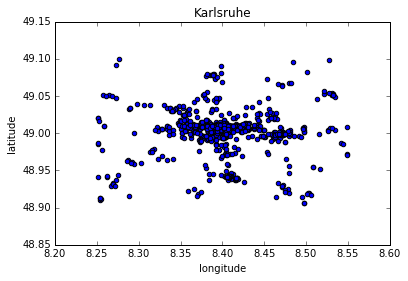

In [35]:
for m in testdf.metro.unique():
    testdf[testdf.metro == m].plot(y = "latitude", x = "longitude", kind = "scatter")
    plt.title(m)

Looking good so can write out to disk again


In [36]:
with open("bus_metro2.json", "wt") as outfile:
    testdf.to_json(outfile)
    
with open("bus_metro2.json", "rt") as infile:
    testdf = pd.read_json(infile)

In [37]:
testdf

,attributes,categories,city,full_address,hours,latitude,longitude,metro,name,neighborhoods,open,review_count,stars,state,type
--0ZoBTQWQra1FxD4rBWmg,{'Accepts Credit Cards': False},"[Property Management, Home Services, Real Estate]",Phoenix,"2920 E Camelback Rd\nSte100\nPhoenix, AZ 85016","{'Tuesday': {'open': '09:00', 'close': '17:00'...",33.510773,-112.018737,Phoenix,Bourquin Residential Group,[],True,4,2.0,AZ,business
--1emggGHgoG6ipd_RMb-g,"{'Take-out': False, 'Parking': {'valet': False...","[Food, Convenience Stores]",Las Vegas,"3280 S Decatur Blvd\nWestside\nLas Vegas, NV 8...",{},36.130531,-115.207238,Las Vegas,Sinclair,[Westside],True,4,4.0,NV,business
--4Pe8BZ6gj57VFL5mUE8g,"{'Parking': {'valet': False, 'garage': False, ...","[Shopping, Office Equipment]",Phoenix,"21001 North Tatum Blvd. #24\nPhoenix, AZ 85050",{},33.676354,-111.973651,Phoenix,Office Max,[],True,9,3.0,AZ,business
--5jkZ3-nUPZxUvtcbr8Uw,"{'Caters': True, 'Good For': {'dinner': False,...","[Greek, Vegetarian, Mediterranean, Restaurants]",Scottsdale,"1336 N Scottsdale Rd\nScottsdale, AZ 85257","{'Wednesday': {'open': '11:00', 'close': '21:0...",33.463373,-111.926908,Phoenix,Mika's Greek,[],True,127,4.5,AZ,business
--7PRjnsjMA6uhPK8mW13Q,{},"[Bars, Nightlife]",Pittsburgh,"3160 Library Rd\nPittsburgh, PA 15234",{},40.371878,-80.008930,Pittsburgh,Castle Tavern,[],True,3,2.5,PA,business
--AKjxBmhm9DWrh-e0hTOw,"{'Attire': 'casual', 'Good For Groups': True, ...","[Restaurants, Italian]",Laval,"993 Boulevard Saint-Martin Ouest\nLaval, QC H7...","{'Friday': {'open': '11:00', 'close': '23:00'}...",45.572509,-73.720293,Montreal,Grigio,[],True,6,4.5,QC,business
--BlvDO_RG2yElKu9XA1_g,"{'Caters': True, 'Good For': {'dinner': False,...","[Sushi Bars, Hawaiian, Chinese, Restaurants]",Scottsdale,"14870 N Northsight Blvd\nSte 103\nScottsdale, ...","{'Wednesday': {'open': '10:30', 'close': '21:0...",33.621605,-111.899066,Phoenix,Asian Island,[],True,122,4.0,AZ,business
--Dl2rW_xO8GuYBomlg9zw,{'By Appointment Only': True},"[Medical Centers, Health & Medical]",Las Vegas,"4505 S Maryland Pkwy\nUniversity\nLas Vegas, N...",{},36.110940,-115.141514,Las Vegas,UNLV Student Health Center,[University],True,7,4.5,NV,business
--LzU4UT9rysIDXbhoWHiQ,"{'Parking': {'valet': False, 'garage': False, ...","[Hair Salons, Day Spas, Nail Salons, Beauty & ...",Pittsburgh,"99 S 10th St\nSouth Side\nPittsburgh, PA 15203","{'Thursday': {'open': '11:00', 'close': '20:00...",40.427499,-79.988313,Pittsburgh,Lunasea Salon+Day Spa,[South Side],True,10,4.5,PA,business
--NCcmQqh_NZbjW1S5XsGQ,"{'Parking': {'valet': False, 'garage': False, ...","[Bakeries, Food, Desserts]",Montréal,"291 Beaudoin Street\nSud-Ouest\nMontréal, QC H...","{'Thursday': {'open': '08:00', 'close': '18:00...",45.474274,-73.585614,Montreal,Sweet Lee's Rustic Bakery,[Sud-Ouest],False,5,4.5,QC,business


Can create a table of min and max lat, long by metro

Finish the workbook here